In [1]:
#import required libraries
import numpy as np
import pandas
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [3]:
#Creating Directory
main_dir = "C:\\Users\\pratham sharma\\Desktop\\Pose detection"
dir_train = os.path.join(main_dir,'train')
dir_val = os.path.join(main_dir,'val')
dir_grab = os.path.join(main_dir,'grab_dataset')

dir_handshake = os.path.join(dir_train,'handshake') 
dir_sitting = os.path.join(dir_train,'sitting')
dir_standing = os.path.join(dir_train,'standing')
dir_Downdog = os.path.join(dir_train,'Downdog')
dir_Goddess= os.path.join(dir_train,'Goddess')
dir_Plank = os.path.join(dir_train,'Plank')
dir_Tree = os.path.join(dir_train,'Tree')
dir_Warrior2 = os.path.join(dir_train,'Warrior2')

os.mkdir(dir_train)
os.mkdir(dir_val)
os.mkdir(dir_grab)
os.mkdir(dir_sitting)
os.mkdir(dir_standing)
os.mkdir(dir_handshake)
os.mkdir(dir_Downdog)
os.mkdir(dir_Goddess)
os.mkdir(dir_Plank)
os.mkdir(dir_Tree)
os.mkdir(dir_Warrior2)


In [1]:
#Applying grabcut on orignal dataset
import cv2
import cvzone
from cvzone.SelfiSegmentationModule import SelfiSegmentation


segmentor = SelfiSegmentation()
i = 1
path = "C:\\Users\\pratham sharma\\Desktop\\Pose detection\\orignal_dataset"

while True:
    img_Val = cv2.imread(path+"\\Train_"+str(i)+".jpg" )
    img_Val = cv2.resize(img_Val, (480,480))
    imgOut_Val = segmentor.removeBG(img_Val,(0,1,0), threshold=0.8)
    cv2. imshow("segmented ", imgOut_Val)
    cv2. imwrite("C:\\Users\\pratham sharma\\Desktop\\Pose detection\\grab_dataset\\Train_"+str(i)+".jpg",imgOut_Val)
    img_Test = cv2.imread(path+"\\Test_"+str(i)+".jpg" )
    img_Test = cv2.resize(img_Test, (480,480))
    imgOut_Test = segmentor.removeBG(img_Test,(0,1,0), threshold=0.8)
    cv2. imshow("segmented ", imgOut_Test)
    cv2. imwrite("C:\\Users\\pratham sharma\\Desktop\\Pose detection\\grab_dataset\\Test_"+str(i)+".jpg",imgOut_Test)
    k = cv2.waitKey(1)
    i+=1
    if i == 1591:
        break
cv2.destroyAllWindows()

In [2]:
#locate dirtory of data set
DIR='C:\\Users\\pratham sharma\\Desktop\\Pose detection'
DIR_Data='C:\\Users\\pratham sharma\\Desktop\\Pose detection\\grab_dataset'


In [3]:
# Read dataset of train and test file
import pandas
train=pandas.read_csv('C:\\Users\\pratham sharma\\Desktop\\Pose detection\\train.csv')
test=pandas.read_csv('C:\\Users\\pratham sharma\\Desktop\\Pose detection\\Val.csv')
train.head()

,image_id,Downdog,Goddess,handshaking,Plank,sitting,standing,Tree,Warrior2
0,Train_1,1,0,0,0,0,0,0,0
1,Train_2,1,0,0,0,0,0,0,0
2,Train_3,1,0,0,0,0,0,0,0
3,Train_4,1,0,0,0,0,0,0,0
4,Train_5,1,0,0,0,0,0,0,0


In [4]:
test.head()

,image_id
0,Test_1
1,Test_2
2,Test_3
3,Test_4
4,Test_5


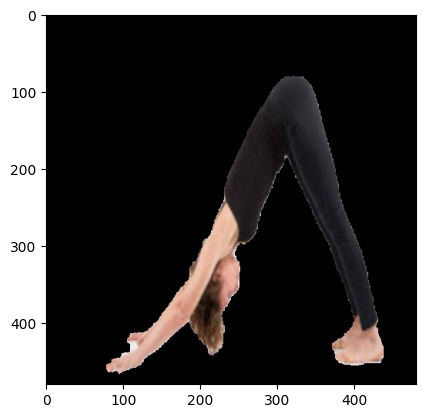

In [8]:
# opening the sample
image = Image.open(r'grab_dataset\Test_1.jpg')
plt.imshow(image)
plt.show()

In [9]:
# Preparing Dataset
class_names=train.loc[:,'Downdog':].columns
print(class_names)

Index(['Downdog', 'Goddess', 'handshaking', 'Plank', 'sitting', 'standing',
       'Tree', 'Warrior2'],
      dtype='object')


In [10]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [11]:
DIR_Data

'C:\\Users\\pratham sharma\\Desktop\\Pose detection\\grab_dataset'

In [12]:
natsort.natsorted(os.listdir(DIR_Data))

['Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 'Test_63.jpg',
 

In [13]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [18]:
import shutil
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR_Data))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR_Data,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Pose detection\train\Downdog')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Pose detection\train\Goddess')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Pose detection\train\handshake')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Pose detection\train\Plank')
            elif(img.split("_")[1].split(".")[0]) and label.item()==4:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Pose detection\train\sitting')
            elif(img.split("_")[1].split(".")[0]) and label.item()==5:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Pose detection\train\standing')
            elif(img.split("_")[1].split(".")[0]) and label.item()==6:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Pose detection\train\Tree')
            elif(img.split("_")[1].split(".")[0]) and label.item()==7:
                shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Pose detection\train\Warrior2')
                
        elif search("Test",img):
            shutil.copy(path,r'C:\Users\pratham sharma\Desktop\Pose detection\val')
    

In [19]:
train_dir=create_train_data()

100%|██████████| 3180/3180 [00:07<00:00, 424.24it/s] 


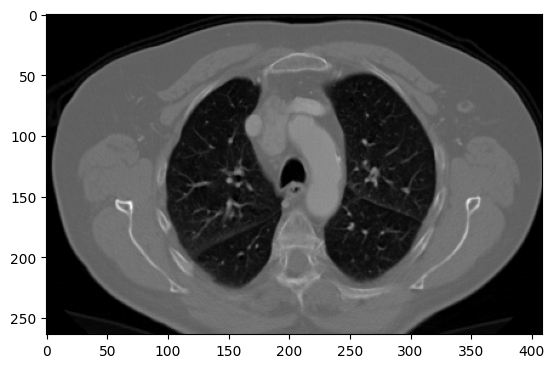

In [2]:
# Data Processing
Train_DIR = r'C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\train'
Categories=['adenocarcinoma','large.cell.carninoma','normal','squamous.cell.carcinoma']

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break


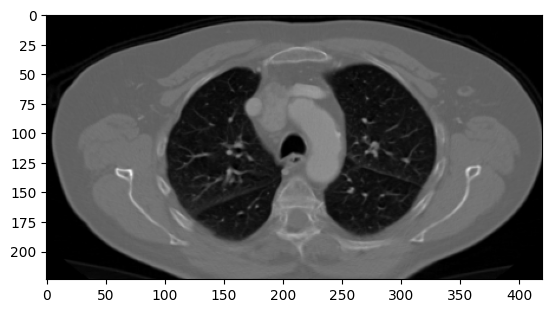

In [4]:
IMG_SIZE_X=420
IMG_SIZE_Y=224
new_image=cv2.resize(old_image,(IMG_SIZE_X,IMG_SIZE_Y))
plt.imshow(new_image)
plt.show()

In [5]:
# Model Preparation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D

In [6]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\train',
                                         target_size=(IMG_SIZE_X,IMG_SIZE_Y),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\test',
                                         target_size=(IMG_SIZE_X,IMG_SIZE_Y),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 491 images belonging to 4 classes.
Found 122 images belonging to 4 classes.


In [10]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE_X,IMG_SIZE_Y,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 420, 224, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 210, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 210, 112, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 105, 56, 64)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 105, 56, 64)       36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 52, 28, 64)      

In [11]:
checkpoint=ModelCheckpoint(r'C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\Model3.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [15]:
# Model traning
model_history=model.fit(train_datagen,validation_data=val_datagen,
                        epochs=10,
                        steps_per_epoch=train_datagen.samples//16,
                        validation_steps=val_datagen.samples//16,
                        callbacks=callbacks)

Epoch 1/10
30/30 [==============================] - ETA: 0s - loss: 0.9048 - accuracy: 0.5642
Epoch 1: val_loss improved from 0.89736 to 0.80840, saving model to C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\Model3.h5
30/30 [==============================] - 52s 2s/step - loss: 0.9048 - accuracy: 0.5642 - val_loss: 0.8084 - val_accuracy: 0.5982
Epoch 2/10
30/30 [==============================] - ETA: 0s - loss: 0.8781 - accuracy: 0.5558
Epoch 2: val_loss did not improve from 0.80840
30/30 [==============================] - 51s 2s/step - loss: 0.8781 - accuracy: 0.5558 - val_loss: 0.8165 - val_accuracy: 0.5179
Epoch 3/10
30/30 [==============================] - ETA: 0s - loss: 0.8903 - accuracy: 0.5789
Epoch 3: val_loss improved from 0.80840 to 0.79434, saving model to C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\Model3.h5
30/30 [==============================] - 51s 2s/step - loss: 0.8903 - accuracy: 0.5789 - val_loss: 0.7943 - val_accuracy: 0.6429
Epoch 4/10
30/30 [======

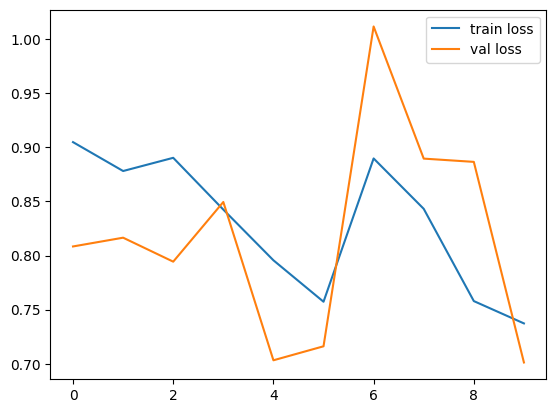

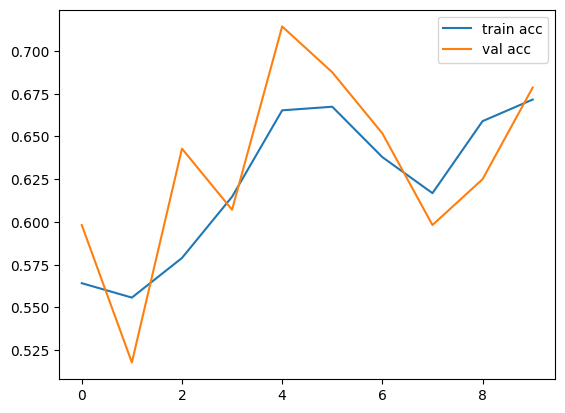

<Figure size 640x480 with 0 Axes>

In [16]:
# plot the loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# predict probabilities for test set
yhat_probs = model.predict(val_datagen, verbose=0)
yhat_probs

array([[8.10085058e-01, 1.57887563e-02, 8.54659639e-03, 1.65579587e-01],
       [6.59906924e-01, 4.47201058e-02, 9.86484252e-03, 2.85508126e-01],
       [5.30168891e-01, 1.62676290e-01, 4.88178106e-03, 3.02273065e-01],
       [7.95567185e-02, 1.50396954e-02, 9.03900683e-01, 1.50295789e-03],
       [1.79036215e-01, 7.85852730e-01, 3.23038257e-04, 3.47879343e-02],
       [7.70168185e-01, 1.41929761e-02, 2.09705397e-01, 5.93339931e-03],
       [9.05198753e-01, 3.22687365e-02, 1.24338421e-03, 6.12891428e-02],
       [6.94165587e-01, 1.53270766e-01, 4.93209995e-03, 1.47631526e-01],
       [8.63820970e-01, 1.88021921e-02, 6.92139380e-04, 1.16684750e-01],
       [7.83956707e-01, 5.10530174e-02, 1.48509280e-03, 1.63505152e-01],
       [2.17102975e-01, 2.60858587e-03, 7.65424252e-01, 1.48642240e-02],
       [8.15388858e-01, 7.11697191e-02, 3.52175417e-03, 1.09919719e-01],
       [4.17423338e-01, 5.32850390e-03, 5.63877761e-01, 1.33703342e-02],
       [8.26313808e-08, 2.24754203e-07, 9.99999642e

In [18]:
#Precision, recall, f1-score, support
Y_pred = model.predict(val_datagen, val_datagen.samples / 16)
val_preds = np.argmax(Y_pred, axis=1)
import sklearn.metrics as metrics
val_trues =val_datagen.classes
from sklearn.metrics import classification_report
report = classification_report(val_trues, val_preds)
print(report)
cm = metrics.confusion_matrix(val_trues, val_preds)
cm

8/8 [==============================] - 5s 553ms/step
              precision    recall  f1-score   support

           0       0.32      0.54      0.40        39
           1       0.29      0.22      0.25        23
           2       0.20      0.14      0.16        29
           3       0.35      0.23      0.27        31

    accuracy                           0.30       122
   macro avg       0.29      0.28      0.27       122
weighted avg       0.30      0.30      0.28       122



array([[21,  4,  8,  6],
       [13,  5,  4,  1],
       [14,  5,  4,  6],
       [17,  3,  4,  7]], dtype=int64)

In [19]:
import sklearn.metrics
recall = sklearn.metrics.recall_score(val_trues, val_preds, average='micro', pos_label="positive")
print(recall)

0.30327868852459017


c:\Users\pratham sharma\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [20]:
val_trues

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

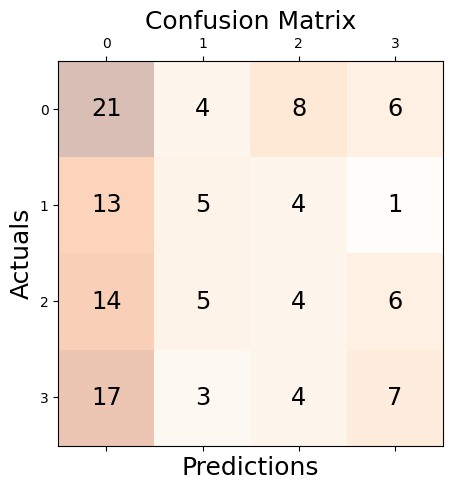

In [21]:
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Oranges, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [25]:
#Model Pridiction
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image
classes = ['adenocarcinoma','large.cell.carninoma','normal','squamous.cell.carcinoma']

model = load_model(r"C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\Model3.h5")
test_image = image.load_img(r"C:\Users\pratham sharma\Desktop\AjaySir\Lung_Cancer\train\squamous.cell.carcinoma\Train_607.png", target_size = (420,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
print(classes[np.argmax(model.predict(test_image))])


1/1 [==============================] - 0s 154ms/step
normal
